In [1]:
#matplotlib magic command
%matplotlib inline

In [5]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [9]:
#read city data file and store as dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [10]:
#read ride data file and stores as dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [11]:
#get the coumns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [13]:
#verify no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [15]:
#check column types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [16]:
#get the unique values of type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [17]:
#get the number of data points for each type (urban)
sum(city_data_df["type"]=="Urban")

66

In [18]:
#get the number of data points for each type (Suburban)
sum(city_data_df["type"]=="Suburban")

36

In [19]:
#get the number of data points for each type (Rural)
sum(city_data_df["type"]=="Rural")

18

In [20]:
#for ride data check for null values
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [22]:
#verify no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [23]:
#check column types for ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [26]:
#merge both csv files into one dataframe
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"], how="left")
#display the new Dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
#create dataframe for urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
#create dataframe for suburban and rural cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [32]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [34]:
#get the number of rides for urban cities (create series using .groupby and count function on ride_id)
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [35]:
#get the number of rides for suburban and rural cities (create series using .groupby and count function on ride_id)
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [37]:
#get the average for urban cities fares(.groupby([x]).mean()[x]
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [38]:
#get the avg of suburban and rural cities fares (.groupby([x]).mean()[x]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [40]:
# Get the average number of drivers for each urban city. (.groupby([x]).mean[x]
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [41]:
# Get the average number of drivers for each suburban and rural cities. (.groupby([x]).mean[x]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

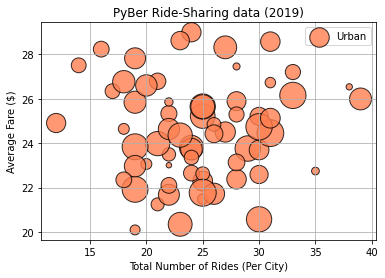

In [53]:
#create a scatter plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=urban_driver_count*10,
            color="coral",
           edgecolor = "black",
            alpha = .8,
           label = "Urban",
           linewidths=1)
plt.title("PyBer Ride-Sharing data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#add legend
plt.legend()

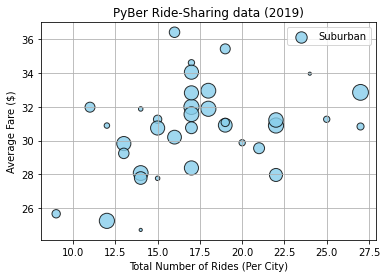

In [55]:
#create a scatter plot for suburban cities
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=suburban_driver_count*10,
            color="skyblue",
           edgecolor = "black",
            alpha = .8,
           label = "Suburban",
           linewidths=1)
plt.title("PyBer Ride-Sharing data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#add legend
plt.legend()

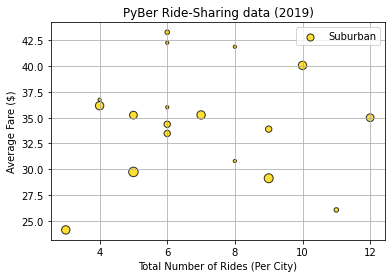

In [56]:
#create a scatter plot for suburban cities
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=rural_driver_count*10,
            color="gold",
           edgecolor = "black",
            alpha = .8,
           label = "Suburban",
           linewidths=1)
plt.title("PyBer Ride-Sharing data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#add legend
plt.legend()

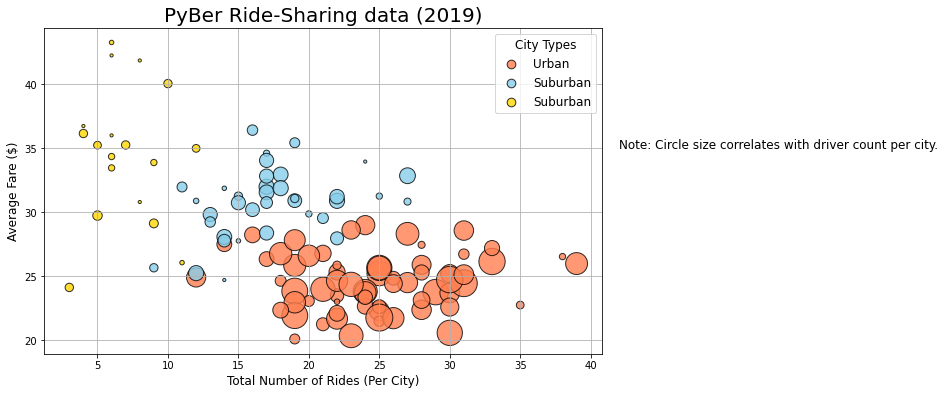

In [71]:
#add the scatter charts for each type of city
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=urban_driver_count*10,
            color="coral",
           edgecolor = "black",
            alpha = .8,
           label = "Urban",
           linewidths=1)

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=suburban_driver_count*10,
            color="skyblue",
           edgecolor = "black",
            alpha = .8,
           label = "Suburban",
           linewidths=1)



plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=rural_driver_count*10,
            color="gold",
           edgecolor = "black",
            alpha = .8,
           label = "Suburban",
           linewidths=1)

#incorporate the other graph properties
plt.title("PyBer Ride-Sharing data (2019)",fontsize=20)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize="12",mode="expanded", scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#incorporate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#save the file
plt.savefig("analysis/Fig1.png",dpi=300,bbox_inches="tight")
plt.show()


